# Análise de Chunking – LGPD

Objetivo:
Analisar o tamanho dos artigos da LGPD para definir um chunk_size que
preserve contexto jurídico e minimize fragmentação.

Este notebook é apenas exploratório e serve de base para a decisão documentada.

## 1. Instalação de dependências

In [11]:
!pip install pypdf matplotlib numpy pandas PyPDF2


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Importar bibliotecas

In [12]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import PyPDF2

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 3. Carregar o PDF da LGPD

In [13]:
pdf_path = r"C:\Users\User\Desktop\projeto-rag\Rag-ChatBot\docs\Texto LGPD.pdf" 

# extrair texto do PDF
def extrair_texto_pdf(caminho_pdf):
    """
    Extrai todo o texto de um PDF
    
    Parameters:
    - caminho_pdf: Path para o arquivo PDF
    
    Returns:
    - texto_completo: String com todo o conteúdo
    """
    texto_completo = ""
    
    with open(caminho_pdf, 'rb') as arquivo:
        leitor_pdf = PyPDF2.PdfReader(arquivo)
        
        for pagina in leitor_pdf.pages:
            texto_completo += pagina.extract_text()
    
    return texto_completo

# extrair texto
try:
    texto_lgpd = extrair_texto_pdf(pdf_path)
    print(f"PDF carregado com sucesso!")
    print(f"Total de caracteres: {len(texto_lgpd):,}")
    print(f"\n Preview (primeiros 500 caracteres):\n")
    print(texto_lgpd[:500])
except FileNotFoundError:
    print(f"Arquivo não encontrado: {pdf_path}")
    print(f"Ajuste a variável 'pdf_path' com o caminho correto do seu PDF")

PDF carregado com sucesso!
Total de caracteres: 111,840

 Preview (primeiros 500 caracteres):

LEI Nº 13.709, DE 14 DE AGOSTO DE 2018  
Texto compilado  
Mensagem de veto  
Vigência  Dispõe sobre a proteção de dados pessoais e altera 
a Lei nº 12.965, de 23 de abril de 2014 (Marco Civil 
da Internet).  
Lei Geral de Proteção de Dados Pessoais 
(LGPD).         (Redação dada pela Lei nº 13.853, de 
2019)    Vigência  
O PRESIDENTE DA REPÚ BLICA  Faço saber que o Congresso Nacional decreta e eu sanciono a 
seguinte Lei:  
CAPÍTULO I  
DISPOSIÇÕES PRELIMINARES  
Art. 1º Esta Lei dispõe sobre 


## 4. Extrair artigos da LGPD

In [14]:
def extrair_artigos(texto):
    """
    Extrai artigos individuais do texto da lei
    
    Parameters:
    - texto: Texto completo da lei
    
    Returns:
    - lista de dicionários com número e conteúdo de cada artigo
    """
    # Padrão para identificar artigos
    # Captura: "Art. 1º", "Art. 2º", etc.
    padrao_artigo = r'(Art\.\s*\d+º?\.?)'
    
    # Dividir texto nos artigos
    partes = re.split(padrao_artigo, texto)
    
    artigos = []
    
    # Percorrer em pares (número do artigo + conteúdo)
    for i in range(1, len(partes), 2):
        if i + 1 < len(partes):
            numero = partes[i].strip()
            conteudo = partes[i + 1].strip()
            
            # Extrair apenas o número
            match_numero = re.search(r'(\d+)', numero)
            if match_numero:
                num = match_numero.group(1)
                
                artigos.append({
                    'numero': num,
                    'titulo': numero,
                    'conteudo': conteudo,
                    'texto_completo': numero + ' ' + conteudo,
                    'tamanho_chars': len(numero + ' ' + conteudo)
                })
    
    return artigos

# Extrair artigos
artigos = extrair_artigos(texto_lgpd)

print(f"{len(artigos)} artigos extraídos!\n")

# Mostrar primeiros 3 artigos
print("Primeiros 3 artigos:")
for i, art in enumerate(artigos[:3], 1):
    print(f"\n{'='*60}")
    print(f"Artigo {art['numero']} - {art['tamanho_chars']} caracteres")
    print(f"{'='*60}")
    print(art['texto_completo'][:300] + '...')

108 artigos extraídos!

Primeiros 3 artigos:

Artigo 1 - 528 caracteres
Art. 1º Esta Lei dispõe sobre o tratamento de dados pessoais, inclusive nos meios digitais, por pessoa 
natural ou por pessoa jurídica de direito público ou privado, com o objetivo de proteger os direitos 
fundamentais de liberdade e de privacidade e o livre desenvolvimento da personalidade da pesso...

Artigo 2 - 558 caracteres
Art. 2º A disciplina da proteção de dados pessoais tem como fundamentos:  
I - o respeito à privacidade;  
II - a autodeterminação informativa;  
III - a liberdade de expressão, de informação, de com unicação e de opinião;  
IV - a inviolabilidade da intimidade, da honra e da imagem;  
V - o desenvo...

Artigo 3 - 1335 caracteres
Art. 3º Esta Lei aplica -se a qualquer operação de tratamento realizada por pessoa natural ou por pessoa 
jurídica de direito público ou privado, independentemente d o meio, do país de sua sede ou do país onde 
estejam localizados os dados, desde que:  
I - a opera

## 5. Análise Estatística dos Tamanhos

In [15]:
# Extrair tamanhos
tamanhos = [art['tamanho_chars'] for art in artigos]

# Calcular estatísticas
estatisticas = {
    'Total de artigos': len(tamanhos),
    'Média': np.mean(tamanhos),
    'Mediana': np.median(tamanhos),
    'Desvio padrão': np.std(tamanhos),
    'Mínimo': np.min(tamanhos),
    'Máximo': np.max(tamanhos),
    'Percentil 50 (P50)': np.percentile(tamanhos, 50),
    'Percentil 75 (P75)': np.percentile(tamanhos, 75),
    'Percentil 90 (P90)': np.percentile(tamanhos, 90),
    'Percentil 95 (P95)': np.percentile(tamanhos, 95),
    'Percentil 99 (P99)': np.percentile(tamanhos, 99),
}

# Exibir estatísticas
print("ESTATÍSTICAS DE TAMANHO DOS ARTIGOS (em caracteres)\n")
print("="*60)
for chave, valor in estatisticas.items():
    if isinstance(valor, float):
        print(f"{chave:.<40} {valor:.0f}")
    else:
        print(f"{chave:.<40} {valor}")
print("="*60)

ESTATÍSTICAS DE TAMANHO DOS ARTIGOS (em caracteres)

Total de artigos........................ 108
Média................................... 1028
Mediana................................. 536
Desvio padrão........................... 1339
Mínimo.................................. 18
Máximo.................................. 7973
Percentil 50 (P50)...................... 536
Percentil 75 (P75)...................... 1273
Percentil 90 (P90)...................... 2403
Percentil 95 (P95)...................... 3712
Percentil 99 (P99)...................... 6129


## 6. Visualização da Distribuição

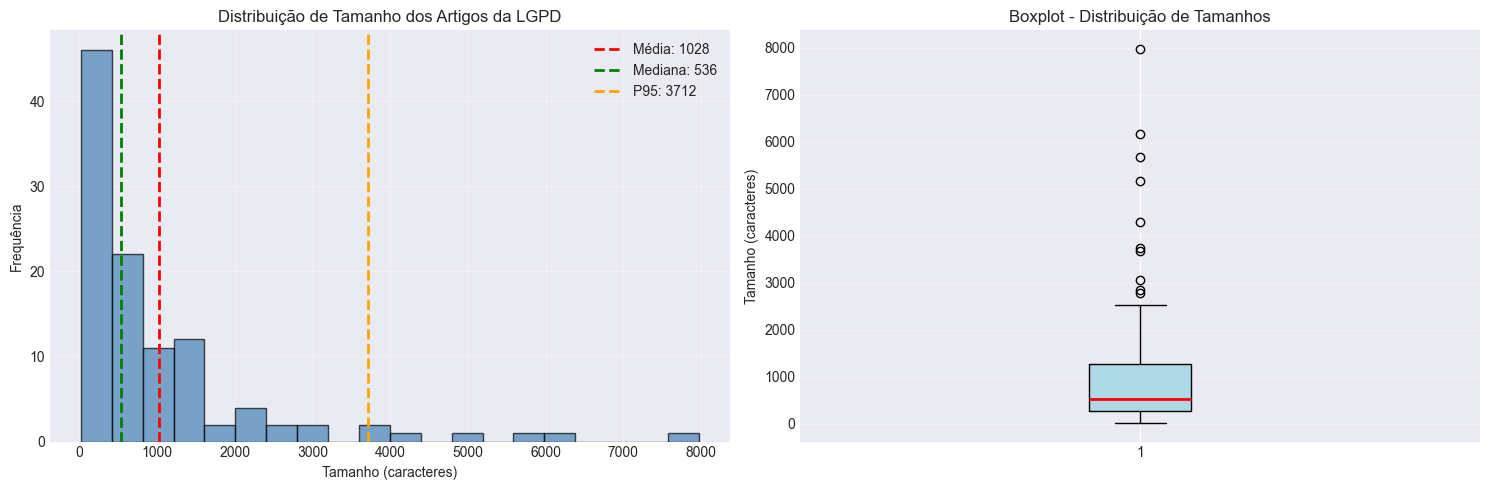


   Interpretação:
   - Linha vermelha (média): centro de massa da distribuição
   - Linha verde (mediana): divide os dados ao meio
   - Linha laranja (P95): 95% dos artigos estão abaixo deste valor


In [16]:
# criar figura com 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. histograma
ax1.hist(tamanhos, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(np.mean(tamanhos), color='red', linestyle='--', linewidth=2, label=f'Média: {np.mean(tamanhos):.0f}')
ax1.axvline(np.median(tamanhos), color='green', linestyle='--', linewidth=2, label=f'Mediana: {np.median(tamanhos):.0f}')
ax1.axvline(np.percentile(tamanhos, 95), color='orange', linestyle='--', linewidth=2, label=f'P95: {np.percentile(tamanhos, 95):.0f}')
ax1.set_xlabel('Tamanho (caracteres)')
ax1.set_ylabel('Frequência')
ax1.set_title('Distribuição de Tamanho dos Artigos da LGPD')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. boxplot
ax2.boxplot(tamanhos, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))
ax2.set_ylabel('Tamanho (caracteres)')
ax2.set_title('Boxplot - Distribuição de Tamanhos')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n   Interpretação:")
print("   - Linha vermelha (média): centro de massa da distribuição")
print("   - Linha verde (mediana): divide os dados ao meio")
print("   - Linha laranja (P95): 95% dos artigos estão abaixo deste valor")

## 7. Tabela com Artigos Maiores

In [17]:
df_artigos = pd.DataFrame(artigos)

# ordena por tamanho (maiores primeiro)
df_maiores = df_artigos.nlargest(10, 'tamanho_chars')[['numero', 'tamanho_chars']]
df_maiores.columns = ['Artigo', 'Tamanho (caracteres)']
df_maiores = df_maiores.reset_index(drop=True)

print("\n TOP 10 ARTIGOS MAIS LONGOS:\n")
print(df_maiores.to_string(index=False))

# calcular quantos artigos seriam divididos com diferentes chunk_sizes
print("\n\n🔍 SIMULAÇÃO: Quantos artigos seriam DIVIDIDOS em múltiplos chunks?\n")
print("="*70)
print(f"{'chunk_size (caracteres)':<25} {'Artigos divididos':<20} {'%'}")
print("="*70)

for chunk_size in [1000, 1500, 2000, 2400, 3000]:
    divididos = len([t for t in tamanhos if t > chunk_size])
    percentual = (divididos / len(tamanhos)) * 100
    print(f"{chunk_size:<25} {divididos:<20} {percentual:.1f}%")

print("="*70)


 TOP 10 ARTIGOS MAIS LONGOS:

Artigo  Tamanho (caracteres)
    55                  7973
     5                  6163
    52                  5680
    55                  5167
    11                  4287
     7                  3735
     4                  3668
    18                  3053
    50                  2837
    58                  2785


🔍 SIMULAÇÃO: Quantos artigos seriam DIVIDIDOS em múltiplos chunks?

chunk_size (caracteres)   Artigos divididos    %
1000                      34                   31.5%
1500                      19                   17.6%
2000                      15                   13.9%
2400                      11                   10.2%
3000                      8                    7.4%


## 8. Recomendação de chunk_size

In [18]:
# Calcular chunk_size recomendado
p95 = np.percentile(tamanhos, 95)
chunk_size_recomendado = int(p95 * 1.05)  # 5% de margem de segurança

# Calcular overlap recomendado (15-20% do chunk_size)
overlap_recomendado = int(chunk_size_recomendado * 0.17)

# Quantos artigos cabem inteiros?
artigos_inteiros = len([t for t in tamanhos if t <= chunk_size_recomendado])
percentual_inteiros = (artigos_inteiros / len(tamanhos)) * 100

print("\n" + "="*70)
print(" RECOMENDAÇÃO FINAL")
print("="*70)
print(f"\nchunk_size recomendado.....: {chunk_size_recomendado} caracteres")
print(f"chunk_overlap recomendado..: {overlap_recomendado} caracteres (~17%)")
print(f"\nResultado esperado:")
print(f"  • {artigos_inteiros}/{len(tamanhos)} artigos ficam INTEIROS ({percentual_inteiros:.1f}%)")
print(f"  • {len(tamanhos) - artigos_inteiros} artigos serão DIVIDIDOS ({100-percentual_inteiros:.1f}%)")
print(f"\n Os artigos divididos terão overlap de {overlap_recomendado} caracteres")
print(f"   para manter contexto entre os chunks.")
print("="*70)




 RECOMENDAÇÃO FINAL

chunk_size recomendado.....: 3897 caracteres
chunk_overlap recomendado..: 662 caracteres (~17%)

Resultado esperado:
  • 103/108 artigos ficam INTEIROS (95.4%)
  • 5 artigos serão DIVIDIDOS (4.6%)

 Os artigos divididos terão overlap de 662 caracteres
   para manter contexto entre os chunks.


## 9. Análise detalhada dos artigos que serão divididos

In [19]:
# Artigos que serão divididos
artigos_divididos = [art for art in artigos if art['tamanho_chars'] > chunk_size_recomendado]

if artigos_divididos:
    print(f"\n  ARTIGOS QUE SERÃO DIVIDIDOS (total: {len(artigos_divididos)}):\n")
    print("="*70)
    
    for art in artigos_divididos:
        tamanho = art['tamanho_chars']
        num_chunks = int(np.ceil(tamanho / (chunk_size_recomendado - overlap_recomendado)))
        
        print(f"\nArtigo {art['numero']}:")
        print(f"  • Tamanho: {tamanho} caracteres")
        print(f"  • Será dividido em ~{num_chunks} chunks")
        print(f"  • Preview: {art['texto_completo'][:150]}...")
        print("-"*70)
else:
    print("\n✅ Nenhum artigo será dividido! Todos cabem em 1 chunk.")


  ARTIGOS QUE SERÃO DIVIDIDOS (total: 5):


Artigo 5:
  • Tamanho: 6163 caracteres
  • Será dividido em ~2 chunks
  • Preview: Art. 5º Para os fins desta Lei, considera -se: 
I - dado pessoal: informação relacionada a pessoa natural identificada ou identificável;  II - dado pe...
----------------------------------------------------------------------

Artigo 11:
  • Tamanho: 4287 caracteres
  • Será dividido em ~2 chunks
  • Preview: Art. 11. O tratamento de dados pessoais sensíveis somente poderá ocorrer nas seguintes hipóteses:  
I - quando o titular ou seu responsável legal cons...
----------------------------------------------------------------------

Artigo 52:
  • Tamanho: 5680 caracteres
  • Será dividido em ~2 chunks
  • Preview: Art. 52. Os agentes de tratamento de dados, em razão das infrações cometidas às normas previstas nesta Lei, ficam 
sujeitos às seguintes sanções admin...
----------------------------------------------------------------------

Artigo 55:
  • Tamanho: 51

## Decisão Final (v1)

chunk_size = 2000  
chunk_overlap = 300  

Justificativa:

**chunk_size:**
- Preserva ~86% dos artigos íntegros
- Mantém granularidade adequada para retrieval
- Evita chunks excessivamente longos
- Melhor equilíbrio entre recall e precisão

**chunk_overlap:** 300 caracteres  
- Preserva continuidade semântica entre chunks consecutivos  
- Reduz risco de perda de incisos ou parágrafos complementares  
- Representa ~15% do chunk_size adotado  